In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os

# Load or train model
def create_and_train_model():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
    x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))
    model.save("mnist_model.h5")
    return model

model = load_model("mnist_model.h5") if os.path.exists("mnist_model.h5") else create_and_train_model()

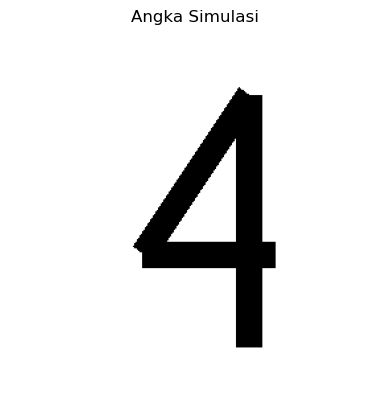

In [4]:
canvas_size = 280
image = Image.new("L", (canvas_size, canvas_size), 255)
draw = ImageDraw.Draw(image)

# Gambar angka 4
draw.line([180, 50, 100, 170], fill=0, width=20)    # Garis miring kiri bawah
draw.line([180, 50, 180, 240], fill=0, width=20)    # Garis vertikal kanan
draw.line([100, 170, 200, 170], fill=0, width=20)   # Garis horizontal tengah

plt.imshow(image, cmap='gray')
plt.title("Angka Simulasi")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 13ms/step


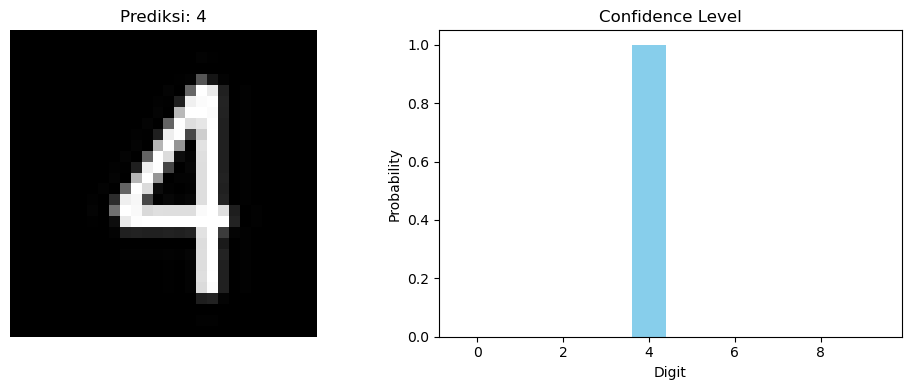

In [5]:
# Preprocessing dan prediksi
img_resized = image.resize((28, 28), Image.LANCZOS)
img_array = ImageOps.invert(img_resized)
img_array = np.array(img_array).astype('float32') / 255
img_array = img_array.reshape(1, 28, 28, 1)

predictions = model.predict(img_array)[0]
predicted_digit = np.argmax(predictions)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Prediksi: {predicted_digit}")
plt.axis("off")

plt.subplot(1,2,2)
plt.bar(range(10), predictions, color='skyblue')
plt.title("Confidence Level")
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.animation as animation
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 200)
ax.set_ylim(-100, 100)
ax.axis('off')

# Dummy layer data (bisa dihubungkan ke real model nanti)
input_data = img_array.reshape(28, 28)[:10, :10]
conv_data = np.random.rand(24, 24)
dense_data = np.random.rand(128)
output_data = predictions

positions = {
    "input": (5, 80),
    "conv": (50, 60),
    "dense": (100, 40),
    "output": (150, 20),
}

def draw_layer(ax, position, size, data, cmap='Blues'):
    rects = []
    rows, cols = data.shape if data.ndim == 2 else (1, len(data))
    for i in range(rows):
        for j in range(cols):
            value = data[i][j] if data.ndim == 2 else data[j]
            color = plt.colormaps[cmap](value) if value > 0 else (1,1,1,1)
            rect = patches.Rectangle(
                (position[0]+j*size, position[1]-i*size), size, size,
                linewidth=0.3, edgecolor='gray', facecolor=color
            )
            rect.set_visible(False)
            ax.add_patch(rect)
            rects.append(rect)
    return rects

patches_input = draw_layer(ax, positions["input"], 1.5, input_data, cmap='Blues')
patches_conv = draw_layer(ax, positions["conv"], 1.2, conv_data, cmap='Purples')
patches_dense = draw_layer(ax, positions["dense"], 0.3, dense_data, cmap='Greens')
patches_output = draw_layer(ax, positions["output"], 1.5, output_data, cmap='Reds')

# Panah antar layer
def draw_arrow(start, end):
    ax.annotate('', xy=end, xytext=start, arrowprops=dict(facecolor='black', arrowstyle='->'))

draw_arrow((45, 70), (50, 70))
draw_arrow((90, 50), (100, 50))
draw_arrow((140, 30), (150, 30))

# Judul layer
ax.text(5, 35, 'Input Layer', fontsize=10)
ax.text(50, 20, 'Conv Layer', fontsize=10)
ax.text(100, 0, 'Dense Layer', fontsize=10)
ax.text(150, -20, 'Output Layer', fontsize=10)

def animate(frame):
    if frame < len(patches_input):
        patches_input[frame].set_visible(True)
        return [patches_input[frame]]
    elif frame < len(patches_input) + len(patches_conv):
        idx = frame - len(patches_input)
        patches_conv[idx].set_visible(True)
        return [patches_conv[idx]]
    elif frame < len(patches_input) + len(patches_conv) + len(patches_dense):
        idx = frame - len(patches_input) - len(patches_conv)
        patches_dense[idx].set_visible(True)
        return [patches_dense[idx]]
    elif frame < len(patches_input) + len(patches_conv) + len(patches_dense) + len(patches_output):
        idx = frame - len(patches_input) - len(patches_conv) - len(patches_dense)
        patches_output[idx].set_visible(True)
        return [patches_output[idx]]
    return []

total_frames = len(patches_input) + len(patches_conv) + len(patches_dense) + len(patches_output)
ani = animation.FuncAnimation(fig, animate, frames=total_frames, interval=10, blit=True, repeat=False)
plt.title("Animasi Proses Jaringan Saraf", fontsize=14)
# plt.show()  # HAPUS atau KOMENTARI baris ini di Jupyter

from IPython.display import HTML
HTML(ani.to_jshtml())
# atau:
# HTML(ani.to_html5_video())